In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mape

ImportError: cannot import name 'mape'

In [2]:
df_tr_all = pd.read_csv("data/train_data.csv")

In [3]:
data_date =  pd.read_csv("data/data_with_date.csv", compression="gzip")

In [4]:
data_date["datetime"] = pd.to_datetime(data_date.date)

In [5]:
data_date = data_date[data_date.datetime > pd.Timestamp('2017-01-01')]
data_date = data_date[data_date.COL_LITR < data_date.COL_LITR.quantile(0.98)]

data_date.shape, data_date.shape

((28725163, 11), (28725163, 11))

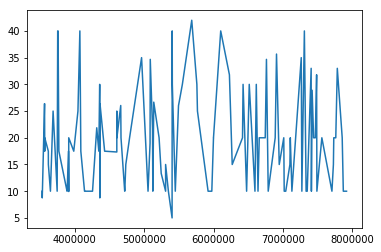

In [143]:
data_date[(data_date.CLIENT == 43683)&(data_date.VID_NP==2)&(data_date.AZS_NUMBER==3731)].COL_LITR.plot()

In [147]:
data_date[(data_date.CLIENT == 1)&(data_date.VID_NP==2)&(data_date.AZS_NUMBER==3731)]

,Unnamed: 0,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,COL_LITR,CENA_CLIENT,date,datetime,DATET,day,dayofweek,is_month_end,is_month_start,week,weekend,AZSCL,CLREG
4793478,4793478,4793478,1,25.01.2017 11:27:30,3731,12,2,30.0,34.6,2017-01-25,2017-01-25,2017-01-25,25,2,False,False,4,False,13731,10012
7606177,7606177,7606177,1,16.03.2017 11:49:36,3731,12,2,30.0,34.6,2017-03-16,2017-03-16,2017-03-16,16,3,False,False,11,False,13731,10012


In [7]:
test_date = pd.Timestamp('2017-12-01')

In [8]:
test_data =  pd.read_csv("test_data_with_ts2.csv")

In [9]:
test_data["DATE"] = pd.to_datetime(test_data.DATE)

In [138]:
test_data[:1]

,Unnamed: 0,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,CENA_CLIENT,DATE,DATET,day,dayofweek,is_month_end,is_month_start,week,weekend,User_count,COL_LITR,AZSCL,CLREG
0,0,0,20183,09.02.2018 14:36:09,842,22,2,36.53,2018-09-02 14:36:09,2018-09-02 14:36:09,2,6,False,False,35,True,3934.0,30.0,201830842,201830022


In [12]:
ftlist = ["day","dayofweek","is_month_end","is_month_start","week","dayofweek"]




ftlist = ["day","dayofweek","is_month_end","is_month_start","week","dayofweek","CENA_CLIENT"]
ftlist+= ["REGION_AZS","CLIENT","VID_NP"]

cat_cols = ["CLIENT","REGION_AZS"]

In [13]:
ftlist

['day',
 'dayofweek',
 'is_month_end',
 'is_month_start',
 'week',
 'dayofweek',
 'CENA_CLIENT',
 'REGION_AZS',
 'CLIENT',
 'VID_NP']

In [14]:
test_date = pd.Timestamp('2017-12-01')
data_date_train =  data_date#[data_date.datetime < test_data]
data_date_test = test_data
#data_date[data_date.datetime >= test_data]
data_date_test.head()
print(data_date_train.shape, data_date_test.shape)


(28725163, 11) (1000000, 9)


In [ ]:
test_date = pd.Timestamp('2017-12-01')
data_date_train =  [data_date.datetime < test_data]
data_date_test = data_date[data_date.datetime >= test_data]
data_date_test.head()
print(data_date_train.shape, data_date_test.shape)


data_date_train["DATET"] = data_date_train.datetime
#data_date_n.drop("datetime", axis=1)
data_date_train["day"] = data_date_train.DATET.dt.day
data_date_train["dayofweek"] = data_date_train.DATET.dt.dayofweek
data_date_train["is_month_end"] = data_date_train.DATET.dt.is_month_end
data_date_train["is_month_start"] = data_date_train.DATET.dt.is_month_start
data_date_train["week"] = data_date_train.DATET.dt.week
data_date_train["weekend"] = data_date_train.DATET.dt.dayofweek>=5

data_date_test["DATET"] = data_date_test.DATE

data_date_test["day"] = data_date_test.DATET.dt.day
data_date_test["dayofweek"] = data_date_test.DATET.dt.dayofweek
data_date_test["is_month_end"] = data_date_test.DATET.dt.is_month_end
data_date_test["is_month_start"] = data_date_test.DATET.dt.is_month_start
data_date_test["week"] = data_date_test.DATET.dt.week
data_date_test["weekend"] = data_date_test.DATET.dt.dayofweek>=5

print("build time ft ok")

In [ ]:
test_date = pd.Timestamp('2017-12-01')
start_date = pd.Timestamp('2017-01-01')

data_date_train1 =  data_date[data_date.datetime < test_date]
data_date_train1 =  data_date_train1[data_date.datetime > start_date]

data_date_test1 = data_date[data_date.datetime >= test_date]
data_date_test1.head()
print(data_date_train1.shape, data_date_test1.shape)


data_date_train1["DATET"] = data_date_train1.datetime
#data_date_n.drop("datetime", axis=1)
data_date_train1["day"] = data_date_train1.DATET.dt.day
data_date_train1["dayofweek"] = data_date_train1.DATET.dt.dayofweek
data_date_train1["is_month_end"] = data_date_train1.DATET.dt.is_month_end
data_date_train1["is_month_start"] = data_date_train1.DATET.dt.is_month_start
data_date_train1["week"] = data_date_train1.DATET.dt.week
data_date_train1["weekend"] = data_date_train1.DATET.dt.dayofweek>=5

data_date_test1["DATET"] = data_date_test1.datetime

data_date_test1["day"] = data_date_test1.DATET.dt.day
data_date_test1["dayofweek"] = data_date_test1.DATET.dt.dayofweek
data_date_test1["is_month_end"] = data_date_test1.DATET.dt.is_month_end
data_date_test1["is_month_start"] = data_date_test1.DATET.dt.is_month_start
data_date_test1["week"] = data_date_test1.DATET.dt.week
data_date_test1["weekend"] = data_date_test1.DATET.dt.dayofweek>=5
data_date_test1["COL_LITR_TRUE"] = data_date_test1["COL_LITR"]    

print("build time ft ok")

In [ ]:
data_date.DATET.max()

In [369]:
data_date_full = data_date_train.append(data_date_test)
data_date_train.shape, data_date_test.shape, data_date_full.shape

((28725163, 20), (1000000, 20), (29725163, 22))

In [391]:
data_date_train["month"] = data_date_train.DATET.dt.month
data_date_train[data_date_train.DATET.dt.month == 12]

,Unnamed: 0,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,COL_LITR,CENA_CLIENT,date,...,DATET,day,dayofweek,is_month_end,is_month_start,week,weekend,AZSCL,CLREG,month
3507764,3507764,3507764,23432,12.01.2017 9:54:17,2475,3,2,30.00,38.27,2017-12-01,...,2017-12-01,1,4,False,True,48,False,234322475,234320003,12
3518012,3518012,3518012,48512,12.01.2017 6:28:05,5032,24,2,40.00,33.95,2017-12-01,...,2017-12-01,1,4,False,True,48,False,485125032,485120024,12
3885229,3885229,3885229,14602,12.01.2017 1:02:20,3549,24,1,200.00,37.00,2017-12-01,...,2017-12-01,1,4,False,True,48,False,146023549,146020024,12
3887310,3887310,3887310,14602,12.01.2017 0:28:17,3546,24,1,230.00,39.00,2017-12-01,...,2017-12-01,1,4,False,True,48,False,146023546,146020024,12
3888117,3888117,3888117,14602,12.01.2017 0:56:35,3549,24,1,180.00,37.00,2017-12-01,...,2017-12-01,1,4,False,True,48,False,146023549,146020024,12
3888701,3888701,3888701,14602,12.01.2017 0:05:31,3549,24,1,300.00,37.00,2017-12-01,...,2017-12-01,1,4,False,True,48,False,146023549,146020024,12
3895682,3895682,3895682,47778,12.01.2017 0:04:41,3363,18,2,30.00,36.45,2017-12-01,...,2017-12-01,1,4,False,True,48,False,477783363,477780018,12
3895692,3895692,3895692,42344,12.01.2017 0:05:05,3875,20,1,40.00,34.53,2017-12-01,...,2017-12-01,1,4,False,True,48,False,423443875,423440020,12
3895748,3895748,3895748,41054,12.01.2017 0:28:38,3261,18,1,70.00,36.05,2017-12-01,...,2017-12-01,1,4,False,True,48,False,410543261,410540018,12
3895759,3895759,3895759,35821,12.01.2017 0:41:00,3943,20,1,150.00,33.82,2017-12-01,...,2017-12-01,1,4,False,True,48,False,358213943,358210020,12


In [382]:
grp = data_date_full.groupby(["CLIENT",1000*data_date_full.DATET.dt.year+data_date_full.DATET.dt.month])

In [384]:
s = grp.agg({"COL_LITR":["sum","median", "mean"], "CENA_CLIENT":"median"} )

s = s.unstack()


In [385]:
s["meanMnoth"]= s["COL_LITR","sum"].mean(axis=1)

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [386]:
 s["COL_LITR","sum"]

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


DATET,2017001,2017002,2017003,2017004,2017005,2017006,2017007,2017008,2017009,2017010,...,2018003,2018004,2018005,2018006,2018007,2018008,2018009,2018010,2018011,2018012
CLIENT,,,,,,,,,,,,,,,,,,,,,
1,4440440.741,4051851.333,4827272.164,4555722.252,3847792.855,1210765.300,1249674.215,1204981.910,1145336.436,1247421.025,...,345538.555,132160.74,171295.15,194205.950,188662.375,160013.725,162166.42,154266.61,151835.100,204699.880
2,551.510,460.640,480.610,524.130,724.170,614.420,320.010,604.010,583.840,698.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12942.400,11780.140,11251.870,9686.110,8696.380,9216.810,12245.250,11448.880,11965.570,13558.960,...,72.710,172.71,172.71,127.500,72.710,172.710,72.71,200.21,100.000,315.420
4,3339.240,1640.000,3386.580,1831.210,1667.220,623.730,492.770,1766.270,4354.930,2079.110,...,NaN,NaN,NaN,NaN,200.000,NaN,NaN,NaN,NaN,50.000
5,6817.010,11789.590,20530.000,13711.830,16835.000,19549.010,8930.000,5384.290,4040.000,4716.090,...,360.000,NaN,300.00,480.000,160.000,NaN,320.00,NaN,160.000,485.000
6,828.840,1324.830,1777.030,509.460,183.160,413.220,1425.700,575.000,853.260,255.420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,560.000,438.000,681.680,785.000,639.170,690.000,435.000,542.570,577.760,255.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2815.980,2914.740,3715.390,3492.570,5186.030,3562.450,3175.080,3043.580,2912.250,2829.280,...,NaN,NaN,NaN,NaN,257.910,NaN,NaN,20.00,70.000,70.000
9,50.000,NaN,NaN,50.000,NaN,NaN,50.000,110.000,240.000,190.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
def getlvl( ind, i, maxi):
    if i == maxi-1:
        res = ind.levels[i]   
    else:  
        lvllist = getlvl(ind, i+1, maxi)
        res =    [a+"_"+b for a in  ind.levels[i]    for b in lvllist]
    return [str(s) for s in res]
#s.columns = getlvl(s.columns,0,len(s.columns.levels))
#s["COL_LITR","median"].div(sm,axis='rows')
seg1 = 40000
seg2 = 1500000
s[s["meanMnoth"]<seg1]["COL_LITR","median"].std(axis=1).mean()

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


12.60066907907716

In [340]:
s[s["meanMnoth"]>seg2]["COL_LITR","median"].std(axis=1).mean()

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


8.65234717266937

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)
/usr/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


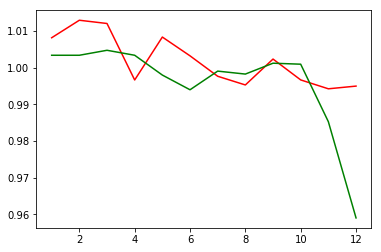

(0.06, 40000)


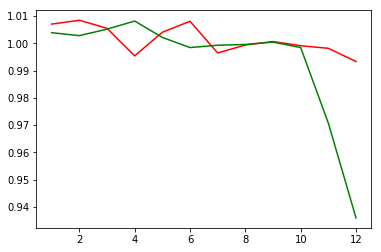

(40000, 1500000)


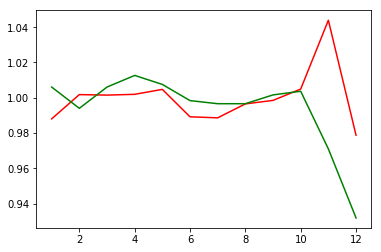

(1500000, 3341532.875666631)


In [362]:
s[(s["meanMnoth"]>seg1)&(s["meanMnoth"]<seg2)]["COL_LITR","median"].std(axis=1).mean()

def f(s,seg1,seg2):
    s = s[(s["meanMnoth"]>seg1)&(s["meanMnoth"]<seg2)]
    #print(s["COL_LITR","mean"].mean(),s["CENA_CLIENT","median"].median() )
    plt.plot(s["COL_LITR","median"].div(s["COL_LITR","median"].mean().median()).mean(),  color="red")
    plt.plot(1/s["CENA_CLIENT","median"].div(s["CENA_CLIENT","median"].median().median()).median(), color="green",)
    # s["CENA_CLIENT","median"].mean().tolist(),
    plt.show()
    return (seg1,seg2)
    

print(f(s,s["meanMnoth"].min(),seg1))
print(f(s,seg1,seg2))
print(f(s,seg2, s["meanMnoth"].max()))


In [329]:
res = s.reset_index().pivot(index='CLIENT', columns='DATET', values=s["COL_LITR","median"])
res[:5]

/usr/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


ValueError: Must pass DataFrame with boolean values only

In [195]:
data_date_train1[data_date_train1.CLIENT==5]

,Unnamed: 0,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,COL_LITR,CENA_CLIENT,date,datetime,DATET,day,dayofweek,is_month_end,is_month_start,week,weekend,AZSCL,CLREG
4791887,4791887,4791887,5,25.01.2017 11:14:07,3775,12,2,30.00,32.83,2017-01-25,2017-01-25,2017-01-25,25,2,False,False,4,False,53775,50012
4843963,4843963,4843963,5,26.01.2017 9:44:03,3775,12,2,30.00,34.88,2017-01-26,2017-01-26,2017-01-26,26,3,False,False,4,False,53775,50012
4844229,4844229,4844229,5,26.01.2017 5:08:20,3778,12,1,120.00,35.90,2017-01-26,2017-01-26,2017-01-26,26,3,False,False,4,False,53778,50012
4905410,4905410,4905410,5,27.01.2017 13:45:02,3776,12,2,40.00,32.83,2017-01-27,2017-01-27,2017-01-27,27,4,False,False,4,False,53776,50012
4905464,4905464,4905464,5,27.01.2017 13:00:17,3774,12,1,250.00,35.53,2017-01-27,2017-01-27,2017-01-27,27,4,False,False,4,False,53774,50012
5030439,5030439,5030439,5,30.01.2017 11:44:10,3730,12,1,200.00,36.46,2017-01-30,2017-01-30,2017-01-30,30,0,False,False,5,False,53730,50012
5033198,5033198,5033198,5,30.01.2017 7:55:41,3776,12,1,200.00,36.46,2017-01-30,2017-01-30,2017-01-30,30,0,False,False,5,False,53776,50012
5033561,5033561,5033561,5,30.01.2017 7:54:06,3776,12,1,45.00,36.46,2017-01-30,2017-01-30,2017-01-30,30,0,False,False,5,False,53776,50012
5042195,5042195,5042195,5,30.01.2017 13:48:52,3730,12,1,200.00,36.46,2017-01-30,2017-01-30,2017-01-30,30,0,False,False,5,False,53730,50012
5052215,5052215,5052215,5,30.01.2017 12:17:42,3776,12,2,30.00,34.88,2017-01-30,2017-01-30,2017-01-30,30,0,False,False,5,False,53776,50012


In [152]:
import numpy as np
def smape(y_true, y_pred): 
    assert(len(y_true)==len(y_pred))
    return np.mean(np.abs(2*(y_true - y_pred) / (y_true+y_pred)) * 100)

In [153]:
data_date_train1[:1]

,Unnamed: 0,ID,CLIENT,DATA_TRANS,AZS_NUMBER,REGION_AZS,VID_NP,COL_LITR,CENA_CLIENT,date,datetime,DATET,day,dayofweek,is_month_end,is_month_start,week,weekend,AZSCL,CLREG
3506423,3506423,3506423,23432,09.01.2017 9:22:18,2497,3,2,30.0,38.41,2017-09-01,2017-09-01,2017-09-01,1,4,False,True,35,False,234322497,234320003


In [174]:
test_date = pd.Timestamp('2017-12-01')
start_date = pd.Timestamp('2017-01-01')

data_date_train1 =  data_date[data_date.datetime < test_date]
data_date_train1 =  data_date_train1[data_date.datetime > start_date]
print(len(data_date_test1.AZS_NUMBER.unique()))

data_date_test1["AZSCL"]=data_date_test1.CLIENT*10000+data_date_test1.AZS_NUMBER
data_date_train1["AZSCL"]=data_date_train1.CLIENT*10000+data_date_train1.AZS_NUMBER
data_date_test1["CLREG"]=data_date_test1.CLIENT*10000+data_date_test1.REGION_AZS
data_date_train1["CLREG"]=data_date_train1.CLIENT*10000+data_date_train1.REGION_AZS

data_date_test1["COL_LITR"]=41
for v in data_date_test1.VID_NP.unique():
    print("v",v)
    tr_v = data_date_train1[data_date_train.VID_NP == v]
    data_date_test1["COL_LITR"][data_date_test1.VID_NP == v] = tr_v["COL_LITR"][-1000:].median()

    grp = tr_v.groupby("REGION_AZS")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.REGION_AZS.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.REGION_AZS.isin(grp.index))].REGION_AZS.map(grp)
    print("REGION_AZS ok")


    grp = tr_v.groupby("AZS_NUMBER")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.AZS_NUMBER.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.AZS_NUMBER.isin(grp.index))].AZS_NUMBER.map(grp)
    print("AZS ok")

    grp = tr_v.groupby("CLIENT")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.CLIENT.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.CLIENT.isin(grp.index))].CLIENT.map(grp)            
    print("CLIENT ok")
    
    grp = tr_v.groupby("CLREG")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.CLREG.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.CLREG.isin(grp.index))].CLREG.map(grp)            
    print("CLREG ok")

    grp = tr_v.groupby("AZSCL")["COL_LITR"].median()
    data_date_test1["COL_LITR"][(data_date_test1.VID_NP == v)&(
            data_date_test1.AZSCL.isin(grp.index)
        )] =   data_date_test1[(data_date_test1.VID_NP == v)&(
            data_date_test1.AZSCL.isin(grp.index))].AZSCL.map(grp)            
    print("AZSCL ok")

/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


3860


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

v 2


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/anaconda3/lib/python3.6/site-packages/ipykern

REGION_AZS ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AZS ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CLIENT ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CLREG ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AZSCL ok
v 1


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


REGION_AZS ok
AZS ok
CLIENT ok
CLREG ok
AZSCL ok
v 3
REGION_AZS ok
AZS ok
CLIENT ok
CLREG ok
AZSCL ok


In [175]:
smape(data_date_test1.COL_LITR, data_date_test1.COL_LITR_TRUE)

33.921672236917345

In [173]:
smape(data_date_test1.COL_LITR-1, data_date_test1.COL_LITR_TRUE)

34.65030983295358

In [130]:
data_date_test["COL_LITR"]=41
data_date_train2 = data_date_train[data_date_train.DATET <  pd.Timestamp('2017-03-01') ]
for v in data_date_test.VID_NP.unique():
    print("v",v)
    tr_v = data_date_train2[data_date_train2.VID_NP == v]
    data_date_test["COL_LITR"][data_date_test.VID_NP == v] = tr_v["COL_LITR"].median()

    grp = tr_v.groupby("REGION_AZS")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.REGION_AZS.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.REGION_AZS.isin(grp.index))].REGION_AZS.map(grp)
    print("REGION_AZS ok")


    grp = tr_v.groupby("AZS_NUMBER")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.AZS_NUMBER.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.AZS_NUMBER.isin(grp.index))].AZS_NUMBER.map(grp)
    print("AZS ok")

    grp = tr_v.groupby("CLIENT")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.CLIENT.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.CLIENT.isin(grp.index))].CLIENT.map(grp)            
    print("CLIENT ok")
    
    grp = tr_v.groupby("CLREG")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.CLREG.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.CLREG.isin(grp.index))].CLREG.map(grp)            
    print("CLREG ok")

    grp = tr_v.groupby("AZSCL")["COL_LITR"].median()
    data_date_test["COL_LITR"][(data_date_test.VID_NP == v)&(
            data_date_test.AZSCL.isin(grp.index)
        )] =   data_date_test[(data_date_test.VID_NP == v)&(
            data_date_test.AZSCL.isin(grp.index))].AZSCL.map(grp)            
    print("AZSCL ok")


v 2


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


REGION_AZS ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AZS ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CLIENT ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CLREG ok


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


AZSCL ok
v 1


/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


REGION_AZS ok
AZS ok
CLIENT ok
CLREG ok
AZSCL ok
v 3
REGION_AZS ok
AZS ok
CLIENT ok
CLREG ok
AZSCL ok


In [131]:
data_date_test[["ID","COL_LITR"]].to_csv("submissions/nknyazev10.csv",index=False)

In [132]:
data_date_train2.shape

(3785897, 20)